In [ ]:
# instalação de bibliotecas
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=08506d8a6f446e2f128f035bf1baaa533e566d4f003210f10fd4aa0571d3c4bf
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


Antecedent: temperatura
Antecedent: volume
Consequent: pressao
simulação 1 :  9.598783417335648
simulação 2 :  6.78450616512071
simulação 3 :  8.462805180381194
simulação 4 :  7.0780975911056245
simulação 5 :  8.733445151011724


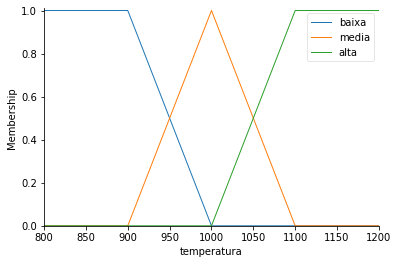

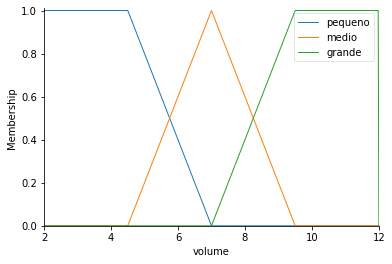

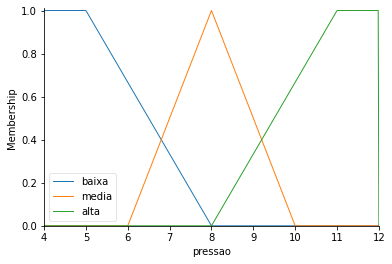

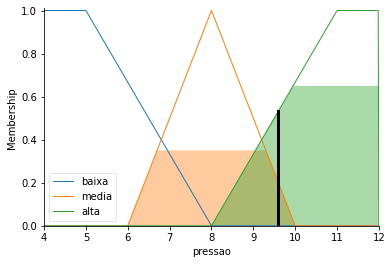

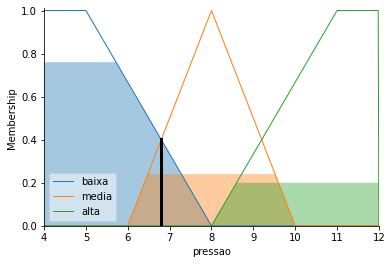

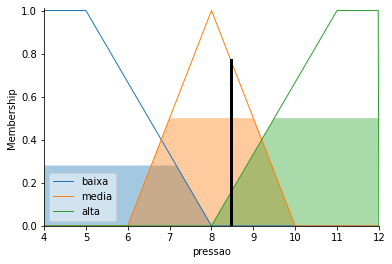

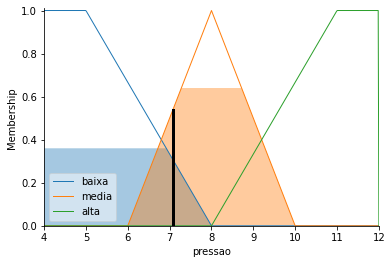

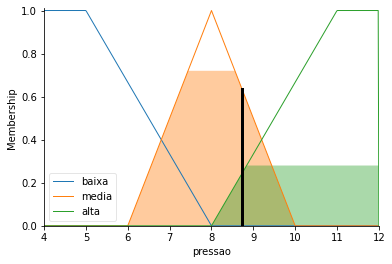

In [ ]:
# ==================================================================
# Universidade Estadual de Feira de Santana
# Mestrado em Ciência da Computação
# Disciplina: PGCC015 - Inteligência Computacional
# Professor: Matheus Giovanni Pires
# Aluno: Noberto Pires Maciel
# EPC05 - 10/11/2020
# Sistema de Controle Fuzzy Logic - Pressão da Caldeira
# ==================================================================

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl, interp_membership, interp_universe, defuzz

# temperatura [800, 1200]; volume [2,12]; pressao [4,12]
# 500 pontos de discretização para todos os universos abaixo
x_temp = np.arange(800, 1200.8, 0.8)
x_vol = np.arange(2, 12.02, 0.02)
x_pressao  = np.arange(4, 12.016, 0.016)

temperatura = ctrl.Antecedent(x_temp, 'temperatura')
volume = ctrl.Antecedent(x_vol, 'volume')
pressao = ctrl.Consequent(x_pressao, 'pressao')

print(temperatura)
print(volume)
print(pressao)

temperatura['baixa'] = fuzz.trapmf(temperatura.universe, [800, 800, 900, 1000])
temperatura['media'] = fuzz.trimf(temperatura.universe,  [900, 1000, 1100])
temperatura['alta'] = fuzz.trapmf(temperatura.universe, [1000, 1100, 1200, 1200])
volume['pequeno'] = fuzz.trapmf(volume.universe,  [2, 2, 4.5, 7])
volume['medio'] = fuzz.trimf(volume.universe,  [4.5, 7, 9.5])
volume['grande'] = fuzz.trapmf(volume.universe,  [7, 9.5, 12, 12])
pressao['baixa'] = fuzz.trapmf(pressao.universe,  [4, 4, 5, 8])
pressao['media'] = fuzz.trimf(pressao.universe, [6, 8, 10])
pressao['alta'] = fuzz.trapmf(pressao.universe,  [8, 11, 12, 12])

pressao.defuzzify_method = 'centroid'
pressao.accumulation_method = max

temperatura.view()
volume.view()
pressao.view()

# regras
regra1 = ctrl.Rule(temperatura['baixa'] & volume['pequeno'], pressao['baixa'])
regra2 = ctrl.Rule(temperatura['media'] & volume['pequeno'], pressao['baixa'])
regra3 = ctrl.Rule(temperatura['alta'] & volume['pequeno'], pressao['media'])
regra4 = ctrl.Rule(temperatura['baixa'] & volume['medio'], pressao['baixa'])
regra5 = ctrl.Rule(temperatura['media'] & volume['medio'], pressao['media'])
regra6 = ctrl.Rule(temperatura['alta'] & volume['medio'], pressao['alta'])
regra7 = ctrl.Rule(temperatura['baixa'] & volume['grande'], pressao['media'])
regra8 = ctrl.Rule(temperatura['media'] & volume['grande'], pressao['alta'])
regra9 = ctrl.Rule(temperatura['alta'] & volume['grande'], pressao['alta'])

pressao_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
pressao_sim = ctrl.ControlSystemSimulation(pressao_ctrl)

# simulate (a) to (e) - [array_temp,array_vol]
simulate = [[965,920,1050,843,1122],[11,7.6,6.3,8.6,5.2]]

for x in range(len(simulate[0])):
  pressao_sim.input['temperatura'] = simulate[0][x]
  pressao_sim.input['volume'] = simulate[1][x]
  pressao_sim.compute()
  print('simulação',x+1,': ',pressao_sim.output['pressao'])
  pressao.view(sim=pressao_sim)